## Setup and Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots appear in the notebook
%matplotlib inline

# National Parks Endangered Species Project

## Objective
Analyze conservation statuses and species observations in U.S. National Parks to identify patterns among endangered species and their sightings.

## Load the Data
Read the CSV files into pandas DataFrames.

In [4]:
species = pd.read_csv(r"C:\Users\morde\OneDrive\Desktop\species_info.csv")
observations = pd.read_csv(r"C:\Users\morde\OneDrive\Desktop\observations.csv")

# Quick look at the data
species.head()
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Check for basic info:

In [5]:
species.info()
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


## Explore the Data
Look at basic statistics and unique values.

In [6]:
# How many species are in each category
print(species['category'].value_counts())

# Conservation status counts
print(species['conservation_status'].value_counts())

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64
conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


## Initial Observations
- Many species may have no assigned conservation status (NaN).
- Categories include Mammal, Bird, Reptile, Amphibian, Fish, Insect, etc.
- We'll fill missing conservation statuses with "No Intervention".

## Handle Missing Data
Some conservation_status values may be null.

In [7]:
species['conservation_status'] = species['conservation_status'].fillna('No Intervention')

## Analyze Conservation Status by Category
Group by category and status to see patterns.

In [8]:
category_counts = species.groupby(['category', 'conservation_status']) \
                         .scientific_name.nunique() \
                         .reset_index()

category_counts

,category,conservation_status,scientific_name
0,Amphibian,Endangered,1
1,Amphibian,No Intervention,72
2,Amphibian,Species of Concern,4
3,Amphibian,Threatened,2
4,Bird,Endangered,4
5,Bird,In Recovery,3
6,Bird,No Intervention,413
7,Bird,Species of Concern,68
8,Fish,Endangered,3
9,Fish,No Intervention,115


## Plot it:

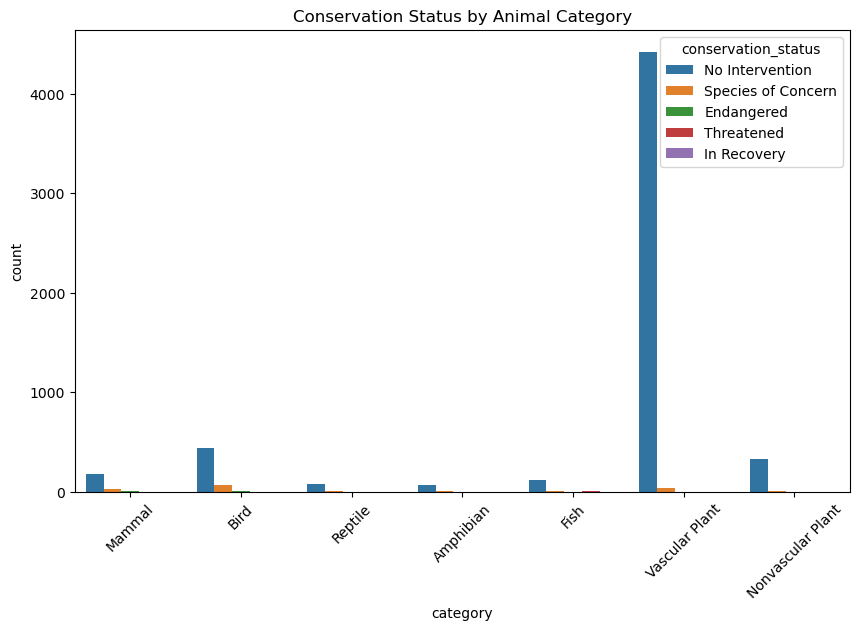

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data=species, x='category', hue='conservation_status')
plt.xticks(rotation=45)
plt.title("Conservation Status by Animal Category")
plt.show()

## Insights
- Identify which categories have the most endangered species.
- Observe which conservation statuses dominate each category.

## Analyze Observations
Which species are most frequently spotted in each park?

In [10]:
observations.head()

# Total observations per park
obs_per_park = observations.groupby('park_name')['observations'].sum().reset_index()
obs_per_park

,park_name,observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


## Plot it:

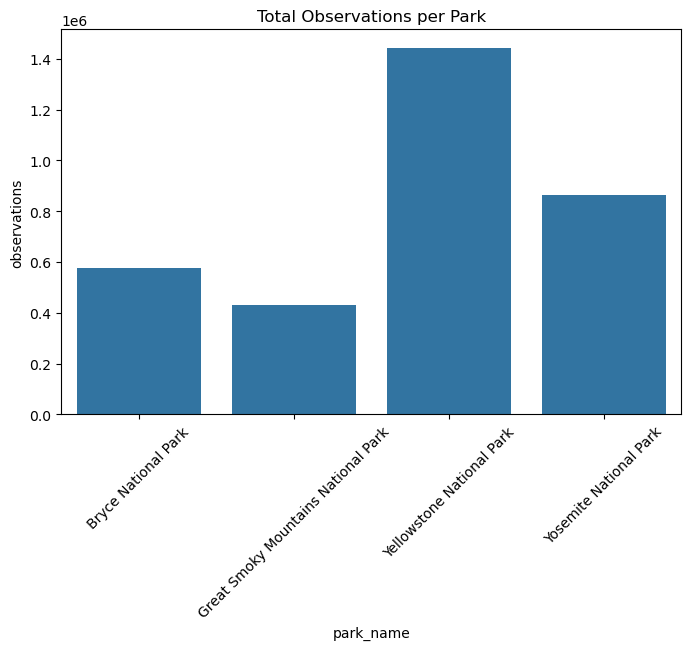

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=obs_per_park, x='park_name', y='observations')
plt.xticks(rotation=45)
plt.title("Total Observations per Park")
plt.show()

## Analysis Questions
1. Which species are most at risk?  
2. Are certain categories (mammals, birds, reptiles) more endangered?  
3. Which parks have the highest endangered species sightings?  
4. Are there any interesting trends in the distribution of species across parks?  

## Endangered Species Observations
Filter endangered species to see how often they are spotted.

In [12]:
endangered_species = species[species['conservation_status'] != 'No Intervention']
merged = endangered_species.merge(observations, on='scientific_name')

endangered_obs_per_park = merged.groupby('park_name')['observations'].sum().reset_index()
endangered_obs_per_park

,park_name,observations
0,Bryce National Park,18609
1,Great Smoky Mountains National Park,12816
2,Yellowstone National Park,44583
3,Yosemite National Park,26913


## Visualize endangered species observations:

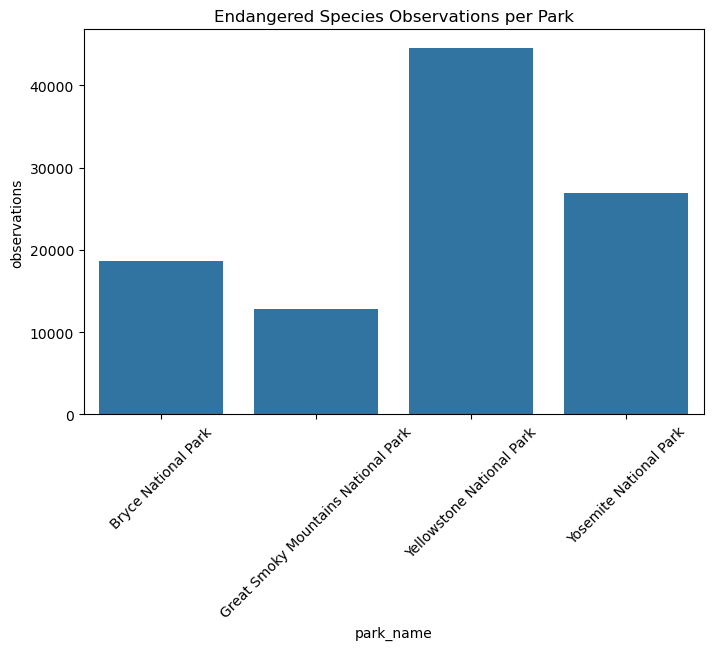

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(data=endangered_obs_per_park, x='park_name', y='observations')
plt.xticks(rotation=45)
plt.title("Endangered Species Observations per Park")
plt.show()